In [1]:
import pandas as pd
import os
from tqdm import tqdm
!pwd

/priv/c3-sysbio/anwer/stratified_GRN


In [2]:
s = 'lioness.01_120405.0.csv'
s

'lioness.01_120405.0.csv'

In [5]:
data = pd.read_csv('../GRN_output/lioness.01_120405.0.csv')
data.head()

,Unnamed: 0,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000282851,ENSG00000282936,ENSG00000282951,ENSG00000283041,ENSG00000283045,ENSG00000283050,ENSG00000283071,ENSG00000283078,ENSG00000283103,ENSG00000283108
0,ENSG00000001167,-0.349407,-0.368612,-0.167475,5.789630,-0.269739,0.412928,5.691002,-0.222930,5.308297,...,-0.520773,-0.149824,0.697641,-0.906667,-0.199223,0.096759,-0.914813,-0.569958,-0.095841,0.068750
1,ENSG00000004848,-0.173895,-0.419028,-0.897649,-0.603571,0.049001,0.747526,-0.060258,0.027669,-0.287978,...,-0.388450,-0.651121,-0.012346,-0.295743,-0.534189,0.152620,0.050559,-0.808662,-0.127628,-0.568774
2,ENSG00000005513,10.149855,-1.021690,-1.622470,-1.436110,0.094283,12.020203,-0.345049,-0.073716,-0.414339,...,-0.265352,-0.561915,0.682281,-0.388608,-0.159031,0.189532,0.952342,-1.175014,-0.068488,-0.089373
3,ENSG00000005889,-0.075044,5.129424,4.810398,-0.298762,-0.111989,-3.114771,3.084784,-1.810477,-0.265377,...,7.487901,0.442141,0.035012,1.869148,1.948115,-2.290882,2.351672,4.474162,-1.345365,1.294946
4,ENSG00000006047,-0.180038,1.457978,1.283890,2.251157,-0.962078,0.792337,0.003948,0.777329,-0.404514,...,-2.455809,-0.685921,-2.252393,-0.880914,-1.566364,0.476197,-3.716606,-1.196298,0.084414,-2.261619


In [8]:
len(set(data['Unnamed: 0']).intersection(data.columns))

712

In [40]:

!mkdir preprocessed_GRN_files_all  

In [41]:
!ls

0_2___1_2.png			 NCI_with_Plaques.pkl
AD_with_No_Plaques.pkl		 NCI_with_Plaques_preprocessed
AD_with_Plaques.pkl		 Untitled1.ipynb
AD_with_no_Plaques		 my_plot.png
AD_with_no_Plaques_preprocessed  plots
GRN_analysis.ipynb		 preprocessed_GRN_files_all
NCI_with_No_Plaques.pkl		 preprocessed_dataframe_edge_weights.csv
NCI_with_Plaques


In [64]:
from tqdm import tqdm

for i in tqdm(os.listdir('../GRN_output/')):
    if 'lioness' not in i:
        continue
    list_of_lists = []
    s = i.split('.')[1] + '.csv'
    data = pd.read_csv('../GRN_output/'+i)
    data.set_index('Unnamed: 0', inplace = True)
    for index,row in data.iterrows():
       
        for i in data.columns:
        
            list_of_lists.append([index, i, row[i]])
    

    data_x = pd.DataFrame(list_of_lists, columns=['TF','Genes','Weights'])
    data_x.to_csv('./preprocessed_GRN_files_all/'+s, index= False)
    
      

100%|██████████████████████████████████████| 642/642 [10:53:13<00:00, 61.05s/it]


In [ ]:
data_x

In [ ]:
for i in os.listdir('../GRN_output/'):
    print(i)

In [9]:
! ls 

0_2___1_2.png			 NCI_with_Plaques
AD_with_No_Plaques.pkl		 NCI_with_Plaques.pkl
AD_with_Plaques.pkl		 NCI_with_Plaques_preprocessed
AD_with_no_Plaques		 my_plot.png
AD_with_no_Plaques_preprocessed  plots
GRN_analysis.ipynb		 preprocessed_dataframe_edge_weights.csv
NCI_with_No_Plaques.pkl


In [2]:
NCI_with_plaques = pd.read_csv('NCI_with_Plaques//lioness.643_120524.186.csv')

In [ ]:
NCI_with_plaques

In [ ]:
NCI_with_plaques.set_index('Unnamed: 0', inplace = True)
NCI_with_plaques

In [ ]:
def data_preprocess(data):
    result_list =[]
    for index, row in data.iterrows():
        for column_name, value in row.items():
            result_list.append([index,column_name, value])
    return pd.DataFrame(result_list)
    

In [ ]:
AD_with_no_plaques.loc['ENSG00000001167','ENSG00000000003']

In [87]:
for i in tqdm(os.listdir('NCI_with_Plaques/')):
    data = pd.read_csv('NCI_with_Plaques/'+i)
    print(i)
    data.set_index('Unnamed: 0', inplace = True)
    l = data_preprocess(data)
    print(l.head())
    l.to_csv('NCI_with_Plaques_preprocessed/'+str(i), index = False)
    break

  0%|                                                    | 0/24 [00:00<?, ?it/s]

lioness.643_120524.186.csv
                 0                1         2
0  ENSG00000001167  ENSG00000000003 -0.105156
1  ENSG00000001167  ENSG00000000419 -0.033097
2  ENSG00000001167  ENSG00000000457 -0.967276
3  ENSG00000001167  ENSG00000000460  5.485215
4  ENSG00000001167  ENSG00000000938 -0.582655


  0%|                                                    | 0/24 [00:42<?, ?it/s]


In [92]:
l.iloc[16958,:]

0    ENSG00000004848
1    ENSG00000000419
2           0.240476
Name: 16958, dtype: object

In [ ]:
result_list =[]
for index, row in AD_with_no_plaques.iterrows():
    for column_name, value in row.items():
        result_list.append([index,column_name, value])
    

In [ ]:
pd.DataFrame(result_list)

In [ ]:
AD_with_no_plaques

In [18]:
!mkdir NCI_with_Plaques_preprocessed

In [19]:
!ls

AD_with_no_Plaques		 NCI_with_Plaques		Untitled.ipynb
AD_with_no_Plaques_preprocessed  NCI_with_Plaques_preprocessed


# 1. AD_with_no_plaques

In [21]:
AD_with_no_plaques = [[] for i in os.listdir('AD_with_no_Plaques_preprocessed/')]
col = []
for j,i in tqdm(enumerate(os.listdir('AD_with_no_Plaques_preprocessed/'))):
    try:
        AD_with_no_plaques[j] = pd.read_csv('AD_with_no_Plaques_preprocessed/'+i)
        col.append(i.split('.')[1])
    except:
        continue
    

19it [01:47,  5.66s/it]


In [ ]:
NCI_with_plaques = [[] for i in os.listdir('NCI_with_Plaques_preprocessed/')]
col_NCI = []
for j,i in tqdm(enumerate(os.listdir('NCI_with_Plaques_preprocessed/'))):
    try:
        NCI_with_plaques[j] = pd.read_csv('NCI_with_Plaques_preprocessed/'+i)
        col_NCI.append(i.split('.')[1])
    except:
        continue

In [20]:
AD_with_no_plaques[9]

[]

In [ ]:
for j,i in enumerate(AD_with_no_plaques):
    print(j)
    if len(i) == 0:
        continue
    else:
        AD_with_no_plaques[j].rename(columns = {'2': col[j]},inplace = True)
        
        

In [24]:
for j,i in enumerate(NCI_with_plaques):
    if len(i) == 0:
        continue
    else:
        NCI_with_plaques[j].rename(columns = {'2': col_NCI[j]},inplace = True)

In [ ]:
NCI_with_plaques[0]

In [ ]:
NCI_with_plaques[1] 

In [36]:
import seaborn as sns

In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
for i in tqdm(AD_with_no_plaques[1:]):
    if len(i) == 0:
        continue
    else:
        AD_with_no_plaques[0] = pd.merge(AD_with_no_plaques[0], i, on = ['0','1'], how ='inner')

100%|███████████████████████████████████████████| 18/18 [02:05<00:00,  6.99s/it]


In [2]:
AD_with_no_plaques[0]

In [29]:
for i in tqdm(NCI_with_plaques[1:]):
    if len(i) == 0:
        continue
    else:
        NCI_with_plaques[0] = pd.merge(NCI_with_plaques[0], i, on = ['0','1'], how ='inner')

100%|███████████████████████████████████████████| 23/23 [02:27<00:00,  6.42s/it]


In [30]:
NCI_with_plaques[0].to_csv('NCI_with_Plaques_preprocessed/NCI_with_plaques.csv', index  =False)
AD_with_no_plaques[0].to_csv('AD_with_no_Plaques_preprocessed/AD_with_no_plaques.csv', index  =False)

In [32]:
import pandas as pd
NCI_with_plaques = pd.read_csv('NCI_with_Plaques_preprocessed/NCI_with_plaques.csv')
AD_with_no_plaques = pd.read_csv('AD_with_no_Plaques_preprocessed/AD_with_no_plaques.csv')

In [ ]:
for i,j in NCI_with_plaques[0].iterrows():
    print(j[1])
    break

In [ ]:
NCI_with_plaques = NCI_with_plaques.iloc[:,0:21]
NCI_with_plaques

In [29]:
AD_with_no_plaques['index'] = AD_with_no_plaques['0'] + '_' +  AD_with_no_plaques['1']
AD_with_no_plaques.set_index('index', inplace =  True)

In [31]:
AD_with_no_plaques = AD_with_no_plaques.drop(columns = ['0','1'])
AD_with_no_plaques.head()

,0_2,1_2,2_2,3_2,4_2,5_2,6_2,7_2,8_2,10_2,11_2,12_2,13_2,14_2,15_2,16_2,17_2,18_2,19_2
index,,,,,,,,,,,,,,,,,,,
ENSG00000001167_ENSG00000000003,0.105403,-0.319196,0.634964,0.145430,0.114249,-0.396344,-0.452379,0.730993,-0.047700,0.371883,-0.131506,0.002520,0.134001,-0.006571,0.271002,0.058364,0.401168,-0.210106,0.052211
ENSG00000001167_ENSG00000000419,0.204676,0.015353,0.213688,0.265589,0.148992,1.013944,0.235821,0.096289,-0.118657,-0.329096,0.087111,0.064768,0.027446,-0.547064,0.284620,-0.062645,0.378753,0.061043,0.133865
ENSG00000001167_ENSG00000000457,0.281512,0.126226,1.059321,0.237950,0.259646,1.487791,0.042573,0.171329,-0.092315,-0.869344,0.128480,0.117742,0.038840,0.186148,0.612704,0.293611,0.579946,0.091571,0.170427
ENSG00000001167_ENSG00000000460,5.915037,5.829533,5.920880,6.019043,5.890336,6.463040,5.258906,6.415386,5.700064,5.579714,5.945883,5.903060,5.883791,5.755113,6.275755,5.835689,6.436519,5.715134,5.983180
ENSG00000001167_ENSG00000000938,-0.527769,-0.577312,-0.850730,-0.624988,-0.347040,-1.863117,-0.949889,-0.445815,-0.530369,0.712017,-0.618716,-0.562949,-0.444083,-0.777270,-0.867268,-0.532066,-0.620131,-0.743258,-0.599700


In [33]:
NCI_with_plaques['index'] = NCI_with_plaques['0'] + '_' +  NCI_with_plaques['1']
NCI_with_plaques.set_index('index', inplace =  True)
NCI_with_plaques = NCI_with_plaques.drop(columns = ['0','1'])
NCI_with_plaques.head()

,0_2_NCI,1_2_NCI,2_2_NCI,3_2_NCI,4_2_NCI,5_2_NCI,6_2_NCI,7_2_NCI,8_2_NCI,9_2_NCI,10_2_NCI,11_2_NCI,12_2_NCI,13_2_NCI,14_2_NCI,15_2_NCI,16_2_NCI,17_2_NCI,18_2_NCI
index,,,,,,,,,,,,,,,,,,,
ENSG00000001167_ENSG00000000003,-0.105156,1.767208,0.163199,-0.245887,-0.005390,-0.252659,-0.344842,-0.726807,0.068266,0.111687,0.027250,0.800877,-0.175691,0.176253,0.026167,0.025896,1.696592,0.778453,0.117257
ENSG00000001167_ENSG00000000419,-0.033097,-0.775812,0.148502,-0.243001,-0.039951,0.015191,0.311603,0.098969,0.118245,0.090324,0.235461,-0.146376,0.133420,-0.688620,0.136632,-0.096101,0.615301,-0.594118,0.163799
ENSG00000001167_ENSG00000000457,-0.967276,-1.485016,0.907066,-0.163442,0.093725,0.154860,0.127196,0.224718,-0.352670,-0.020325,0.285928,-0.753057,0.144320,-0.342384,0.195848,0.131224,1.011803,-1.043215,0.178412
ENSG00000001167_ENSG00000000460,5.485215,6.753909,6.356403,5.939087,5.993190,5.927359,5.722978,5.716545,5.963800,5.951777,6.021186,6.367487,5.964829,5.704796,5.968269,6.010218,7.384499,5.425333,5.802691
ENSG00000001167_ENSG00000000938,-0.582655,-0.801756,0.211695,-0.532325,-0.603598,-0.552414,-0.837449,-0.647929,-0.804276,-0.409135,-0.717288,0.423237,-0.619041,-0.061036,-0.609603,-0.452992,0.094385,3.103929,-0.449017


In [69]:
import numpy as np
from tqdm import tqdm
from scipy.spatial.distance import cosine

def cosine_x(x,y):
    x_norm = np.linalg.norm(x)
    #print(x)
    #print(x_norm)
    #x = x/x_norm
    y_norm = np.linalg.norm(y)
    y = y/x_norm
    #print(x)
    cosine_similarity  = cosine(x,y)
    return cosine_similarity


    
cosine_similarity_list = []
edge_list = []
s = 0
for i,j in tqdm(NCI_with_plaques.sort_values(by='0_2_NCI', ascending = False).iterrows()):
    s = s+1
    x = AD_with_no_plaques.loc[i,].tolist()
    y = j.tolist()
    cosine_similarity_list.append(cosine_x(x,y))
    edge_list.append(i)
    if s == 100000:
        break
    

99999it [00:16, 6004.42it/s]


In [81]:
x = sorted(cosine_similarity_list, reverse = True)
s = 0
for i in x:
    s = s+1
    ind = cosine_similarity_list.index(i)
    print(edge_list[ind])
    if s == 10:
        break

ENSG00000182986_ENSG00000178917
ENSG00000167637_ENSG00000204618
ENSG00000083828_ENSG00000188672
ENSG00000181894_ENSG00000188672
ENSG00000120693_ENSG00000249626
ENSG00000124216_ENSG00000188672
ENSG00000160908_ENSG00000249626
ENSG00000005889_ENSG00000204618
ENSG00000172006_ENSG00000188672
ENSG00000179388_ENSG00000249626


In [120]:
min(D[D_columns[0]])

-22.84568635000681

# Verification

In [125]:
import pandas as pd
NCI_with_plaques = pd.read_csv('NCI_with_Plaques_preprocessed/NCI_with_plaques.csv')
AD_with_no_plaques = pd.read_csv('AD_with_no_Plaques_preprocessed/AD_with_no_plaques.csv')

In [130]:
NCI_with_plaques.head()

,0,1,643_120524,664_120530,926_131031,291_120430,682_120604,176_120424,895_130923,949_131107,...,805_130701,463_120514,19_120411,722_120531,451_120507,158_120423,170_120423,668_120530,688_120604,937_131101
5451123,ENSG00000153879,ENSG00000153132,29.319251,29.642847,29.216614,29.704153,29.231767,29.115201,29.251495,29.086630,...,29.358384,29.264542,29.344083,29.853518,29.275142,29.451391,29.004127,29.411792,28.131335,29.146878
11589557,ENSG00000221869,ENSG00000153132,29.203276,29.561168,29.110408,29.547768,29.112523,29.037000,29.131982,28.990635,...,29.224983,29.155848,29.213419,29.835331,29.144719,29.307187,28.943259,29.273564,28.114504,29.039146
5444590,ENSG00000153879,ENSG00000083307,29.088998,28.210251,28.908880,29.008612,28.963506,28.893278,29.106253,28.943364,...,29.010936,28.970209,29.206366,33.216428,28.891651,29.325014,27.988867,28.694750,28.554985,29.073442
5448479,ENSG00000153879,ENSG00000130770,29.029696,29.793439,29.074429,29.220539,28.970651,29.137992,29.057592,28.993484,...,28.983116,28.960437,29.023969,29.902206,28.875372,28.493522,29.201354,28.972262,29.077914,28.732771
11583024,ENSG00000221869,ENSG00000083307,28.966561,28.115097,28.825126,28.906178,28.852644,28.839404,28.981020,28.841001,...,28.902552,28.842314,29.096890,33.045395,28.807316,29.168277,27.987193,28.578222,28.420144,28.961899


In [126]:
AD_with_no_plaques.sort_values(by= '255_120426', inplace = True, ascending = False)
NCI_with_plaques.sort_values(by= '643_120524', inplace = True, ascending = False)
AD_with_no_plaques = AD_with_no_plaques.iloc[0:100000,]
NCI_with_plaques = NCI_with_plaques.iloc[0:100000,]

In [127]:
AD_with_no_plaques.head()

,0,1,255_120426,911_131031,132_120419,861_130911,389_120503,538_120516,471_120514,515_120515,...,165_120423,435_120507,516_120515,510_120515,941_131101,714_120531,530_120515,371_120502,58_120417,393_120503
5451123,ENSG00000153879,ENSG00000153132,29.305274,29.104259,29.291042,29.248844,29.293475,28.362762,29.205548,29.287465,...,29.697767,29.079448,29.585809,29.138811,29.180419,29.319495,29.296336,29.310680,29.026144,29.315238
11589557,ENSG00000221869,ENSG00000153132,29.184769,29.014845,29.180497,29.129557,29.180093,28.298103,29.076504,29.171844,...,29.530004,28.971908,29.461049,29.023172,29.029779,29.187939,29.177529,29.197646,28.958160,29.195291
5448479,ENSG00000153879,ENSG00000130770,29.139984,28.914160,29.145467,29.081831,29.287872,28.745255,28.977779,29.205956,...,29.993005,28.716144,29.392265,28.987231,29.646162,28.974834,29.112864,29.063919,29.028533,29.133853
5444590,ENSG00000153879,ENSG00000083307,29.072149,28.930756,28.457036,29.294948,29.562607,28.881797,29.003716,29.186629,...,30.611489,29.083246,28.462023,29.110594,28.509274,28.964519,28.988107,29.153220,29.010538,28.780047
11586913,ENSG00000221869,ENSG00000130770,29.033586,28.829009,29.049340,28.964077,29.179277,28.635226,28.879016,29.088770,...,29.779998,28.609297,29.261064,28.882113,29.473246,28.877730,28.997842,28.967579,28.936358,29.023637


In [128]:
NCI_with_plaques.head()

,0,1,643_120524,664_120530,926_131031,291_120430,682_120604,176_120424,895_130923,949_131107,...,805_130701,463_120514,19_120411,722_120531,451_120507,158_120423,170_120423,668_120530,688_120604,937_131101
5451123,ENSG00000153879,ENSG00000153132,29.319251,29.642847,29.216614,29.704153,29.231767,29.115201,29.251495,29.086630,...,29.358384,29.264542,29.344083,29.853518,29.275142,29.451391,29.004127,29.411792,28.131335,29.146878
11589557,ENSG00000221869,ENSG00000153132,29.203276,29.561168,29.110408,29.547768,29.112523,29.037000,29.131982,28.990635,...,29.224983,29.155848,29.213419,29.835331,29.144719,29.307187,28.943259,29.273564,28.114504,29.039146
5444590,ENSG00000153879,ENSG00000083307,29.088998,28.210251,28.908880,29.008612,28.963506,28.893278,29.106253,28.943364,...,29.010936,28.970209,29.206366,33.216428,28.891651,29.325014,27.988867,28.694750,28.554985,29.073442
5448479,ENSG00000153879,ENSG00000130770,29.029696,29.793439,29.074429,29.220539,28.970651,29.137992,29.057592,28.993484,...,28.983116,28.960437,29.023969,29.902206,28.875372,28.493522,29.201354,28.972262,29.077914,28.732771
11583024,ENSG00000221869,ENSG00000083307,28.966561,28.115097,28.825126,28.906178,28.852644,28.839404,28.981020,28.841001,...,28.902552,28.842314,29.096890,33.045395,28.807316,29.168277,27.987193,28.578222,28.420144,28.961899


In [162]:
df = pd.merge(AD_with_no_plaques,NCI_with_plaques, on=['0','1'], how = 'inner')
df.head()

,0,1,255_120426,911_131031,132_120419,861_130911,389_120503,538_120516,471_120514,515_120515,...,805_130701,463_120514,19_120411,722_120531,451_120507,158_120423,170_120423,668_120530,688_120604,937_131101
0,ENSG00000153879,ENSG00000153132,29.305274,29.104259,29.291042,29.248844,29.293475,28.362762,29.205548,29.287465,...,29.358384,29.264542,29.344083,29.853518,29.275142,29.451391,29.004127,29.411792,28.131335,29.146878
1,ENSG00000221869,ENSG00000153132,29.184769,29.014845,29.180497,29.129557,29.180093,28.298103,29.076504,29.171844,...,29.224983,29.155848,29.213419,29.835331,29.144719,29.307187,28.943259,29.273564,28.114504,29.039146
2,ENSG00000153879,ENSG00000130770,29.139984,28.914160,29.145467,29.081831,29.287872,28.745255,28.977779,29.205956,...,28.983116,28.960437,29.023969,29.902206,28.875372,28.493522,29.201354,28.972262,29.077914,28.732771
3,ENSG00000153879,ENSG00000083307,29.072149,28.930756,28.457036,29.294948,29.562607,28.881797,29.003716,29.186629,...,29.010936,28.970209,29.206366,33.216428,28.891651,29.325014,27.988867,28.694750,28.554985,29.073442
4,ENSG00000221869,ENSG00000130770,29.033586,28.829009,29.049340,28.964077,29.179277,28.635226,28.879016,29.088770,...,28.880343,28.858582,28.921960,29.750440,28.789299,28.413067,29.081935,28.867307,28.962477,28.623967


In [163]:
df.iloc[:,21:]

,643_120524,664_120530,926_131031,291_120430,682_120604,176_120424,895_130923,949_131107,698_120605,768_130523,...,805_130701,463_120514,19_120411,722_120531,451_120507,158_120423,170_120423,668_120530,688_120604,937_131101
0,29.319251,29.642847,29.216614,29.704153,29.231767,29.115201,29.251495,29.086630,29.517006,29.276003,...,29.358384,29.264542,29.344083,29.853518,29.275142,29.451391,29.004127,29.411792,28.131335,29.146878
1,29.203276,29.561168,29.110408,29.547768,29.112523,29.037000,29.131982,28.990635,29.385751,29.153009,...,29.224983,29.155848,29.213419,29.835331,29.144719,29.307187,28.943259,29.273564,28.114504,29.039146
2,29.029696,29.793439,29.074429,29.220539,28.970651,29.137992,29.057592,28.993484,28.977429,29.043045,...,28.983116,28.960437,29.023969,29.902206,28.875372,28.493522,29.201354,28.972262,29.077914,28.732771
3,29.088998,28.210251,28.908880,29.008612,28.963506,28.893278,29.106253,28.943364,29.305943,28.981898,...,29.010936,28.970209,29.206366,33.216428,28.891651,29.325014,27.988867,28.694750,28.554985,29.073442
4,28.928273,29.634267,28.967270,29.101682,28.863208,29.037955,28.939498,28.887807,28.871805,28.941082,...,28.880343,28.858582,28.921960,29.750440,28.789299,28.413067,29.081935,28.867307,28.962477,28.623967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88211,6.979739,6.818627,6.442163,6.904990,6.440556,6.820436,6.742070,6.742224,6.347768,6.952133,...,6.596017,6.043216,6.578530,7.978302,6.532087,6.635328,5.982303,6.682207,6.633929,6.551202
88212,6.942927,6.663296,8.934555,5.940572,6.876632,6.492978,6.387146,6.511483,5.288185,6.839306,...,6.511711,5.929243,11.649589,8.464457,5.967924,6.548292,4.222672,6.656749,-2.011629,5.036990
88213,7.079929,6.577378,6.678437,7.155766,7.115862,6.614299,6.793849,5.757143,6.754735,6.790398,...,6.358104,7.321743,6.442670,8.025313,6.772970,5.841799,5.318214,7.003644,6.735529,6.544263
88214,7.013318,6.746364,6.815250,7.427077,6.463581,7.278574,6.958672,7.445155,6.265552,7.300292,...,6.866725,6.679668,7.201372,9.423688,6.011483,8.615050,6.020405,7.049429,6.971726,6.613283


In [164]:
df

,0,1,255_120426,911_131031,132_120419,861_130911,389_120503,538_120516,471_120514,515_120515,...,805_130701,463_120514,19_120411,722_120531,451_120507,158_120423,170_120423,668_120530,688_120604,937_131101
0,ENSG00000153879,ENSG00000153132,29.305274,29.104259,29.291042,29.248844,29.293475,28.362762,29.205548,29.287465,...,29.358384,29.264542,29.344083,29.853518,29.275142,29.451391,29.004127,29.411792,28.131335,29.146878
1,ENSG00000221869,ENSG00000153132,29.184769,29.014845,29.180497,29.129557,29.180093,28.298103,29.076504,29.171844,...,29.224983,29.155848,29.213419,29.835331,29.144719,29.307187,28.943259,29.273564,28.114504,29.039146
2,ENSG00000153879,ENSG00000130770,29.139984,28.914160,29.145467,29.081831,29.287872,28.745255,28.977779,29.205956,...,28.983116,28.960437,29.023969,29.902206,28.875372,28.493522,29.201354,28.972262,29.077914,28.732771
3,ENSG00000153879,ENSG00000083307,29.072149,28.930756,28.457036,29.294948,29.562607,28.881797,29.003716,29.186629,...,29.010936,28.970209,29.206366,33.216428,28.891651,29.325014,27.988867,28.694750,28.554985,29.073442
4,ENSG00000221869,ENSG00000130770,29.033586,28.829009,29.049340,28.964077,29.179277,28.635226,28.879016,29.088770,...,28.880343,28.858582,28.921960,29.750440,28.789299,28.413067,29.081935,28.867307,28.962477,28.623967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88211,ENSG00000147118,ENSG00000254936,6.588678,6.604587,6.098600,6.793990,6.493640,6.183353,6.667772,6.089649,...,6.596017,6.043216,6.578530,7.978302,6.532087,6.635328,5.982303,6.682207,6.633929,6.551202
88212,ENSG00000141040,ENSG00000281183,6.588641,7.040344,6.446099,5.527797,6.500888,8.785316,6.372737,6.359261,...,6.511711,5.929243,11.649589,8.464457,5.967924,6.548292,4.222672,6.656749,-2.011629,5.036990
88213,ENSG00000171634,ENSG00000169306,6.588502,6.810174,6.379034,6.296295,6.560421,6.908056,6.982284,6.821974,...,6.358104,7.321743,6.442670,8.025313,6.772970,5.841799,5.318214,7.003644,6.735529,6.544263
88214,ENSG00000126804,ENSG00000186638,6.588375,6.323244,6.566358,5.746244,6.660772,6.830029,6.687455,6.789942,...,6.866725,6.679668,7.201372,9.423688,6.011483,8.615050,6.020405,7.049429,6.971726,6.613283


In [165]:
df.to_csv('preprocessed_dataframe_edge_weights.csv', index =False)

In [145]:
labels = ['AD' for i in range(19)] + (['NCI' for i in range(24)])

In [ ]:
labels

In [133]:
df['index'] = df['0'] + '_' +  df['1']
df.set_index('index', inplace =  True)
df = df.drop(columns = ['0','1'])
df.head()

,255_120426,911_131031,132_120419,861_130911,389_120503,538_120516,471_120514,515_120515,440_120507,165_120423,...,805_130701,463_120514,19_120411,722_120531,451_120507,158_120423,170_120423,668_120530,688_120604,937_131101
index,,,,,,,,,,,,,,,,,,,,,
ENSG00000153879_ENSG00000153132,29.305274,29.104259,29.291042,29.248844,29.293475,28.362762,29.205548,29.287465,29.441899,29.697767,...,29.358384,29.264542,29.344083,29.853518,29.275142,29.451391,29.004127,29.411792,28.131335,29.146878
ENSG00000221869_ENSG00000153132,29.184769,29.014845,29.180497,29.129557,29.180093,28.298103,29.076504,29.171844,29.293359,29.530004,...,29.224983,29.155848,29.213419,29.835331,29.144719,29.307187,28.943259,29.273564,28.114504,29.039146
ENSG00000153879_ENSG00000130770,29.139984,28.914160,29.145467,29.081831,29.287872,28.745255,28.977779,29.205956,29.087528,29.993005,...,28.983116,28.960437,29.023969,29.902206,28.875372,28.493522,29.201354,28.972262,29.077914,28.732771
ENSG00000153879_ENSG00000083307,29.072149,28.930756,28.457036,29.294948,29.562607,28.881797,29.003716,29.186629,26.015953,30.611489,...,29.010936,28.970209,29.206366,33.216428,28.891651,29.325014,27.988867,28.694750,28.554985,29.073442
ENSG00000221869_ENSG00000130770,29.033586,28.829009,29.049340,28.964077,29.179277,28.635226,28.879016,29.088770,28.977756,29.779998,...,28.880343,28.858582,28.921960,29.750440,28.789299,28.413067,29.081935,28.867307,28.962477,28.623967


In [ ]:
df.T

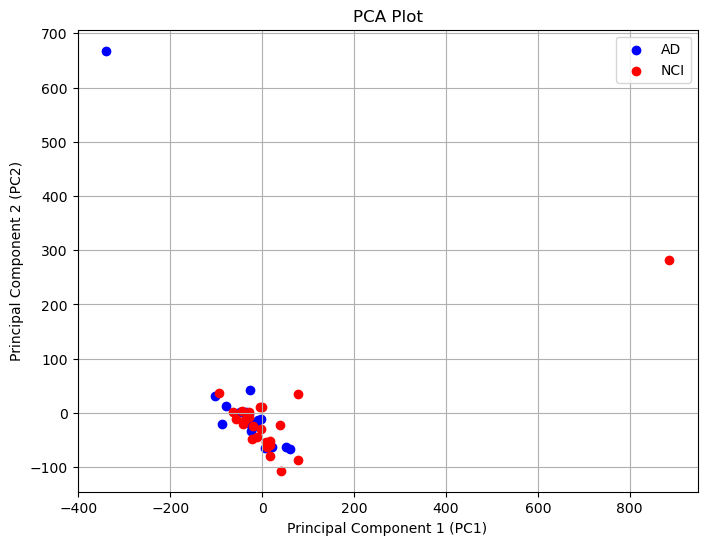

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.T)

# Perform PCA
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['label'] = labels

class_AD = pca_df[pca_df.label == 'AD']
class_NCI = pca_df[pca_df.label == 'NCI']

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(class_AD['PC1'], class_AD['PC2'], c='b', marker='o', label='AD')
plt.scatter(class_NCI['PC1'], class_NCI['PC2'], c='r', marker='o', label='NCI')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA Plot')
plt.legend()
plt.grid(True)
plt.show()

In [155]:
pca.explained_variance_ratio_

array([0.25845556, 0.15736643])

In [158]:
pca_df

,PC1,PC2,label
0,-28.324821,-1.455210,AD
1,-23.127190,-32.749253,AD
2,-35.113580,0.984487,AD
3,-101.585494,30.163283,AD
4,-9.441325,-13.636920,AD
5,61.353225,-66.161082,AD
6,-26.310031,-14.447259,AD
7,-1.699540,-11.648693,AD
8,-87.348629,-20.015821,AD
9,5.292690,-65.132117,AD


In [160]:
df.T

index,ENSG00000153879_ENSG00000153132,ENSG00000221869_ENSG00000153132,ENSG00000153879_ENSG00000130770,ENSG00000153879_ENSG00000083307,ENSG00000221869_ENSG00000130770,ENSG00000221869_ENSG00000083307,ENSG00000153879_ENSG00000196951,ENSG00000221869_ENSG00000196951,ENSG00000172216_ENSG00000042980,ENSG00000153879_ENSG00000145088,...,ENSG00000170631_ENSG00000114541,ENSG00000171827_ENSG00000267199,ENSG00000177045_ENSG00000182185,ENSG00000196152_ENSG00000280474,ENSG00000141905_ENSG00000163794,ENSG00000147118_ENSG00000254936,ENSG00000141040_ENSG00000281183,ENSG00000171634_ENSG00000169306,ENSG00000126804_ENSG00000186638,ENSG00000077150_ENSG00000166592
255_120426,29.305274,29.184769,29.139984,29.072149,29.033586,28.959619,28.503476,28.495480,28.151857,27.994255,...,6.589273,6.589181,6.589093,6.589063,6.588701,6.588678,6.588641,6.588502,6.588375,6.588373
911_131031,29.104259,29.014845,28.914160,28.930756,28.829009,28.851254,28.423807,28.400373,28.085818,28.061812,...,6.714264,6.642436,6.780412,6.647949,6.583410,6.604587,7.040344,6.810174,6.323244,6.992737
132_120419,29.291042,29.180497,29.145467,28.457036,29.049340,28.494379,28.343147,28.333680,27.914718,27.864862,...,6.093001,6.322862,6.814402,6.689663,6.933116,6.098600,6.446099,6.379034,6.566358,6.555747
861_130911,29.248844,29.129557,29.081831,29.294948,28.964077,29.151105,28.575776,28.540862,28.043281,28.443746,...,6.640736,6.790839,6.442484,6.639155,6.753082,6.793990,5.527797,6.296295,5.746244,6.977701
389_120503,29.293475,29.180093,29.287872,29.562607,29.179277,29.477775,29.098795,29.100439,27.577854,27.626382,...,6.561740,6.327958,6.653078,6.662112,6.598740,6.493640,6.500888,6.560421,6.660772,6.675827
538_120516,28.362762,28.298103,28.745255,28.881797,28.635226,28.780452,29.005154,28.963475,28.609003,28.219236,...,6.581638,6.126159,6.373892,7.660595,6.876324,6.183353,8.785316,6.908056,6.830029,6.388348
471_120514,29.205548,29.076504,28.977779,29.003716,28.879016,28.896529,28.216649,28.202140,28.113231,27.957145,...,6.510767,6.499572,6.301751,6.274485,6.672875,6.667772,6.372737,6.982284,6.687455,6.665317
515_120515,29.287465,29.171844,29.205956,29.186629,29.088770,29.074796,28.600403,28.589257,28.048470,27.928771,...,6.253665,6.499101,6.641176,6.708874,6.513328,6.089649,6.359261,6.821974,6.789942,6.697653
440_120507,29.441899,29.293359,29.087528,26.015953,28.977756,26.169351,28.454489,28.429893,28.371489,28.358550,...,6.669063,6.375144,6.393716,6.822324,6.523213,6.258595,6.101249,6.588224,5.894263,7.207401
165_120423,29.697767,29.530004,29.993005,30.611489,29.779998,30.379074,30.265705,30.157426,27.281102,26.367054,...,7.299657,7.684398,6.985410,7.685637,5.632970,6.421419,6.908761,9.089824,7.682204,6.660750


In [142]:
class_AD

,PC1,PC2,label


In [139]:
pca_df

,PC1,PC2,PC3,PC4
0,-28.324821,-1.455210,-16.627731,12.360444
1,-23.127190,-32.749254,-59.928219,15.348948
2,-35.113580,0.984487,-37.341868,40.941575
3,-101.585494,30.163279,-92.086614,38.393600
4,-9.441325,-13.636921,1.142022,8.585800
5,61.353225,-66.161083,-15.440710,-143.106057
6,-26.310031,-14.447260,-27.851824,4.863971
7,-1.699540,-11.648693,23.069265,9.635837
8,-87.348629,-20.015818,-111.495678,127.288789
9,5.292690,-65.132118,269.564096,23.974831


In [32]:
import numpy as np
from tqdm import tqdm
from scipy.spatial.distance import cosine

def cosine_x(x,y):
    x_norm = np.linalg.norm(x)
    #print(x)
    #print(x_norm)
    #x = x/x_norm
    y_norm = np.linalg.norm(y)
    y = y/x_norm
    #print(x)
    cosine_similarity  = cosine(x,y)
    return cosine_similarity


    


In [83]:
cosine_similarity_list_AD_NCI = []
edge_list_AD_NCI = []
s = 0
for i in tqdm(df.columns[2:21]):
    for j in df.columns[21:]:
        if i ==j:
            continue
        x = list(df[i])
        y = list(df[j])
        cosine_similarity_list_AD_NCI.append(cosine_x(x,y))
        edge_list_AD_NCI.append(str(i)+'_'+ str(j))
    

100%|███████████████████████████████████████████| 19/19 [00:51<00:00,  2.70s/it]


In [84]:
cosine_similarity_list_nci = []
edge_list_nci = []
s = 0
for i in tqdm(df.columns[21:]):
    for j in df.columns[21:]:
        if i ==j:
            continue
        x = list(df[i])
        y = list(df[j])
        cosine_similarity_list_nci.append(cosine_x(x,y))
        edge_list_nci.append(str(i)+'_'+ str(j))

100%|███████████████████████████████████████████| 24/24 [00:56<00:00,  2.37s/it]


In [85]:
cosine_similarity_list_AD = []
edge_list_AD = []
s = 0
for i in tqdm(df.columns[2:21]):
    for j in df.columns[2:21]:
        if i ==j:
            continue
        x = list(df[i])
        y = list(df[j])
        cosine_similarity_list_AD.append(cosine_x(x,y))
        edge_list_AD.append(str(i)+'_'+ str(j))

100%|███████████████████████████████████████████| 19/19 [00:33<00:00,  1.78s/it]


In [86]:
import numpy as np
np.std(cosine_similarity_list_AD_NCI)

0.00690638540654384

In [ ]:
import numpy as np
import plotly.express as px

# Generate some random data for the PDF (replace this with your data)
data = np.random.normal(loc=0, scale=1, size=1000)

# Create a histogram to estimate the PDF
fig = px.histogram(cosine_similarity_list_AD_NCI, nbins=30, histnorm='probability density')

# Customize the plot with labels and titles
fig.update_layout(title='Probability Density Function (PDF)',xaxis_title='Value',yaxis_title='Density')

# Show the plot
fig.show()




In [87]:
np.std(cosine_similarity_list_nci)

0.008503626640910159

In [88]:
np.std(cosine_similarity_list)

0.00690638540654384

In [90]:
np.mean(cosine_similarity_list_AD_NCI)

0.0040181156681871975

In [91]:
np.mean(cosine_similarity_list_AD)

0.0032526742048690706

In [92]:
np.mean(cosine_similarity_list_nci)

0.004733536744253473

In [93]:
np.median(cosine_similarity_list_AD)

0.00175804886260722

In [94]:
np.median(cosine_similarity_list_AD_NCI)

0.0018947211494579896

In [95]:
np.median(cosine_similarity_list_nci)

0.002006863792303526

In [97]:
max(cosine_similarity_list_AD_NCI)

0.049089641130960815

In [98]:
max(cosine_similarity_list_nci)

0.03588081974800772

In [99]:
max(cosine_similarity_list_AD)

0.017335939842293646

In [101]:
NCI_with_plaques['index'] = NCI_with_plaques['0'] + '_' +  NCI_with_plaques['1']
NCI_with_plaques.set_index('index', inplace =  True)
NCI_with_plaques = NCI_with_plaques.drop(columns = ['0','1'])
NCI_with_plaques.head()

,643_120524,664_120530,926_131031,291_120430,682_120604,176_120424,895_130923,949_131107,698_120605,768_130523,...,805_130701,463_120514,19_120411,722_120531,451_120507,158_120423,170_120423,668_120530,688_120604,937_131101
index,,,,,,,,,,,,,,,,,,,,,
ENSG00000001167_ENSG00000000003,-0.105156,1.767208,0.163199,-0.245887,-0.005390,-0.252659,-0.344842,-0.726807,0.068266,0.111687,...,0.026167,0.025896,1.696592,0.778453,0.117257,0.066161,0.367756,0.649169,-0.322899,-0.160677
ENSG00000001167_ENSG00000000419,-0.033097,-0.775812,0.148502,-0.243001,-0.039951,0.015191,0.311603,0.098969,0.118245,0.090324,...,0.136632,-0.096101,0.615301,-0.594118,0.163799,0.030734,1.243624,0.592682,0.243169,0.028662
ENSG00000001167_ENSG00000000457,-0.967276,-1.485016,0.907066,-0.163442,0.093725,0.154860,0.127196,0.224718,-0.352670,-0.020325,...,0.195848,0.131224,1.011803,-1.043215,0.178412,0.159979,1.650951,0.796072,0.267159,-0.048692
ENSG00000001167_ENSG00000000460,5.485215,6.753909,6.356403,5.939087,5.993190,5.927359,5.722978,5.716545,5.963800,5.951777,...,5.968269,6.010218,7.384499,5.425333,5.802691,5.851097,7.351011,6.769995,6.038639,6.050449
ENSG00000001167_ENSG00000000938,-0.582655,-0.801756,0.211695,-0.532325,-0.603598,-0.552414,-0.837449,-0.647929,-0.804276,-0.409135,...,-0.609603,-0.452992,0.094385,3.103929,-0.449017,-0.515656,-0.946332,-1.710538,-0.749375,-0.325560


In [107]:
NCI_with_plaques = NCI_with_plaques.iloc[:,0:19]

In [104]:
AD_with_no_plaques['index'] = AD_with_no_plaques['0'] + '_' +  AD_with_no_plaques['1']
AD_with_no_plaques.set_index('index', inplace =  True)
AD_with_no_plaques = AD_with_no_plaques.drop(columns = ['0','1'])
AD_with_no_plaques.head()

,255_120426,911_131031,132_120419,861_130911,389_120503,538_120516,471_120514,515_120515,440_120507,165_120423,435_120507,516_120515,510_120515,941_131101,714_120531,530_120515,371_120502,58_120417,393_120503
index,,,,,,,,,,,,,,,,,,,
ENSG00000001167_ENSG00000000003,0.105403,-0.319196,0.634964,0.145430,0.114249,-0.396344,-0.452379,0.730993,-0.047700,0.371883,-0.131506,0.002520,0.134001,-0.006571,0.271002,0.058364,0.401168,-0.210106,0.052211
ENSG00000001167_ENSG00000000419,0.204676,0.015353,0.213688,0.265589,0.148992,1.013944,0.235821,0.096289,-0.118657,-0.329096,0.087111,0.064768,0.027446,-0.547064,0.284620,-0.062645,0.378753,0.061043,0.133865
ENSG00000001167_ENSG00000000457,0.281512,0.126226,1.059321,0.237950,0.259646,1.487791,0.042573,0.171329,-0.092315,-0.869344,0.128480,0.117742,0.038840,0.186148,0.612704,0.293611,0.579946,0.091571,0.170427
ENSG00000001167_ENSG00000000460,5.915037,5.829533,5.920880,6.019043,5.890336,6.463040,5.258906,6.415386,5.700064,5.579714,5.945883,5.903060,5.883791,5.755113,6.275755,5.835689,6.436519,5.715134,5.983180
ENSG00000001167_ENSG00000000938,-0.527769,-0.577312,-0.850730,-0.624988,-0.347040,-1.863117,-0.949889,-0.445815,-0.530369,0.712017,-0.618716,-0.562949,-0.444083,-0.777270,-0.867268,-0.532066,-0.620131,-0.743258,-0.599700


In [105]:
AD_with_no_plaques

,255_120426,911_131031,132_120419,861_130911,389_120503,538_120516,471_120514,515_120515,440_120507,165_120423,435_120507,516_120515,510_120515,941_131101,714_120531,530_120515,371_120502,58_120417,393_120503
index,,,,,,,,,,,,,,,,,,,
ENSG00000001167_ENSG00000000003,0.105403,-0.319196,0.634964,0.145430,0.114249,-0.396344,-0.452379,0.730993,-0.047700,0.371883,-0.131506,0.002520,0.134001,-0.006571,0.271002,0.058364,0.401168,-0.210106,0.052211
ENSG00000001167_ENSG00000000419,0.204676,0.015353,0.213688,0.265589,0.148992,1.013944,0.235821,0.096289,-0.118657,-0.329096,0.087111,0.064768,0.027446,-0.547064,0.284620,-0.062645,0.378753,0.061043,0.133865
ENSG00000001167_ENSG00000000457,0.281512,0.126226,1.059321,0.237950,0.259646,1.487791,0.042573,0.171329,-0.092315,-0.869344,0.128480,0.117742,0.038840,0.186148,0.612704,0.293611,0.579946,0.091571,0.170427
ENSG00000001167_ENSG00000000460,5.915037,5.829533,5.920880,6.019043,5.890336,6.463040,5.258906,6.415386,5.700064,5.579714,5.945883,5.903060,5.883791,5.755113,6.275755,5.835689,6.436519,5.715134,5.983180
ENSG00000001167_ENSG00000000938,-0.527769,-0.577312,-0.850730,-0.624988,-0.347040,-1.863117,-0.949889,-0.445815,-0.530369,0.712017,-0.618716,-0.562949,-0.444083,-0.777270,-0.867268,-0.532066,-0.620131,-0.743258,-0.599700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000278129_ENSG00000283050,-0.163018,-0.096249,-0.285696,-0.488774,-0.127964,-0.085758,-0.157491,-0.245858,-0.821628,-0.857020,-0.260659,-0.028310,-0.183039,1.064427,-0.235678,0.128153,-0.350048,-0.033530,-0.172350
ENSG00000278129_ENSG00000283071,-0.668422,-0.739565,-0.323940,-0.803689,-0.498082,-0.796442,-0.795268,-0.242640,-0.564642,-1.176898,-0.687343,-0.784969,-0.857813,-1.340063,-0.530713,-0.844535,-0.720892,-0.772337,-0.797620
ENSG00000278129_ENSG00000283078,-0.549748,-0.767913,-0.431868,-0.536272,-0.301299,-0.378041,-0.585033,-0.606909,-1.285590,1.851486,-0.622960,-0.629152,-0.419988,-4.971500,-0.481325,-0.094106,-1.244422,-0.744125,-0.542824


In [108]:
import numpy as np
from tqdm import tqdm
from scipy.spatial.distance import cosine

def cosine_x(x,y):
    x = sorted(x)
    y = sorted(y)
    x_norm = np.linalg.norm(x)
    #print(x)
    #print(x_norm)
    #x = x/x_norm
    y_norm = np.linalg.norm(y)
    y = y/x_norm
    #print(x)
    cosine_similarity  = cosine(x,y)
    return cosine_similarity


    
cosine_similarity_list_edges = []
edge_list_edges = []
s = 0
for i,j in tqdm(NCI_with_plaques.sort_values(by='643_120524', ascending = False).iterrows()):
    s = s+1
    x = AD_with_no_plaques.loc[i,].tolist()
    y = j.tolist()
    cosine_similarity_list_edges.append(cosine_x(x,y))
    edge_list_edges.append(i)
    if s == 100000:
        break
    

99999it [00:20, 4938.15it/s]


In [112]:
x = sorted(cosine_similarity_list_edges, reverse = True)
s = 0
str_list=[]
for i in x:
    s = s+1
    ind = cosine_similarity_list_edges.index(i)
    str_list.extend(edge_list_edges[ind].split('_'))
    if s == 100:
        break

In [60]:
import pandas as pd
data = pd.read_csv('./preprocessed_GRN_files_all_top_200000/01_120405.csv')

In [61]:

data

,TF,Genes,Weights
0,ENSG00000001167,ENSG00000000003,-0.349407
1,ENSG00000001167,ENSG00000000419,-0.368612
2,ENSG00000001167,ENSG00000000457,-0.167475
3,ENSG00000001167,ENSG00000000460,5.789630
4,ENSG00000001167,ENSG00000000938,-0.269739
...,...,...,...
199995,ENSG00000009950,ENSG00000204316,-0.777779
199996,ENSG00000009950,ENSG00000204323,-0.405057
199997,ENSG00000009950,ENSG00000204334,-0.615537
199998,ENSG00000009950,ENSG00000204344,0.848317


In [59]:
data.to_csv('./preprocessed_GRN_files_all_top_200000/01_120405.csv', index = False)